# **PHASE 3 PROJECT ON Tanzania WATER WELLS**

# **Introduction**


Access to clean and reliable water is a fundamental need, yet many communities in Tanzania face challenges due to malfunctioning or poorly maintained water pumps. The Tanzania Water Services dataset provides valuable information about water points across the country, including their location, management, and operational status. By leveraging data science and machine learning, this project aims to build predictive models that can classify the functionality of water pumps, supporting better maintenance planning and resource allocation for improved water service delivery.

# **Ojectives**

1. **Develop and evaluate** machine learning models capable of predicting the operational status of water pumps — whether they are functional, non-functional, or require repair.

2. **Apply an iterative modeling approach**, starting with a simple baseline model (Logistic Regression) to establish initial performance.

3. **Refine and improve** the baseline model through hyperparameter tuning to enhance prediction accuracy and generalization.

4. Build a more complex model (Random Forest Classifier) to capture non-linear relationships and improve performance on the classification task.

4. **Compare model results** based on performance metrics and interpretability to determine the most effective and practical solution.

Support data-driven decision-making in Tanzania’s water infrastructure management by providing insights into factors influencing pump functionality.

# **Project Dataset Selection and Justification**

# **Tanzanian Water Wells**

For this project, I selected the Tanzanian Water Wells dataset from the DrivenData “Pump It Up: Data Mining the Water Table” competition. This dataset provides information about over 59,000 water wells across Tanzania, including details on their construction, location, management, and current operational status. The target variable, status_group, indicates whether a well is functional, functional but needs repair, or non-functional, making this a multiclass classification problem fully aligned with the requirements of the Phase 3 project.

**The decision to use this dataset was guided by both technical and business relevance considerations:**

**Relevance to Real-World Problems:**
Access to clean water remains a critical issue in developing regions, and identifying which wells are likely to fail is a meaningful application of data science for public good. This problem has direct implications for **NGOs, government agencies, and infrastructure planners responsible for maintaining water systems.**

**Strong Alignment with Classification Objectives:**
The project’s target variable is categorical, enabling the use of supervised classification algorithms such as **logistic regression, decision trees, and ensemble models.** The dataset’s structure naturally supports an iterative modeling process involving baseline and tuned models, as required by the project guidelines.

**Technical Suitability and Manageability:**
The dataset is sufficiently complex—with over 40 features spanning categorical, numeric, and geospatial data—but remains clean and well-documented. It allows for exploration of essential preprocessing techniques such as handling missing values, encoding categorical features, scaling, and avoiding data leakage, without overwhelming computational or cleaning requirements.

**Industry and Career Relevance:**
The dataset’s focus on infrastructure reliability and maintenance parallels predictive analytics challenges found in the energy and engineering sectors, including geothermal plant operations and equipment reliability monitoring. As such, this project demonstrates the transferability of classification methods to industrial asset management and sustainability use cases.

In summary, the Tanzanian Water Wells dataset provides a meaningful, technically rich, and career-relevant foundation for applying machine learning classification techniques to a real-world problem. It offers both interpretability and complexity, making it an ideal choice for this phase of the data science program.

# **Business Understanding**

Access to clean and functional water points remains a major challenge in Tanzania, especially in rural areas where communities rely heavily on boreholes and hand pumps. Many wells fail due to poor maintenance, aging infrastructure, or environmental conditions, making it difficult for authorities to prioritize which sites need attention first.

This project aims to support the **Tanzanian Ministry of Water and Irrigation and partner organizations** such as **WaterAid, UNICEF, and World Vision** by developing a predictive classification model that identifies the operational status of water wells. The model will help stakeholders allocate maintenance resources more efficiently, reduce downtime, and improve access to clean water.

Our target **stakeholders** include **government planners,** **NGOs**, and **field maintenance teams** who can use model insights to schedule preventive repairs and optimize field operations. The classification model will predict whether a well is functional, needs repair, or non-functional based on features such as construction year, installer, pump type, and location.

The project scope focuses on building and evaluating this predictive model and communicating actionable insights through analysis and visualization. Implementation of automated systems, real-time monitoring, or field validation lies outside the current scope.

By helping decision-makers transition from reactive to preventive maintenance, this project aligns with Sustainable Development Goal 6 (Clean Water and Sanitation) and supports long-term water access sustainability across Tanzania.



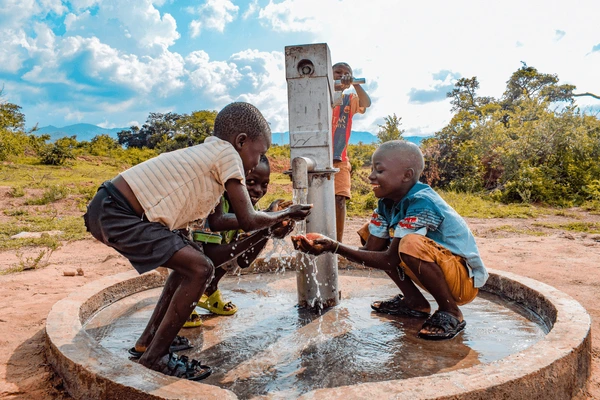

In [51]:
from IPython.display import Image, display

# Use the full path to your image file
image_path = r"C:\Users\G-Osundwa\Documents\phase3\p3\Tanzania_Water_Wells_Phase_3_project\Tanzania_water_wells.jpg"

# Display the image
display(Image(filename=image_path))

# **Data Understanding**


The dataset used in this project is the Tanzanian Water Wells dataset, sourced from the Taarifa and Tanzania Ministry of Water repositories, and made publicly available through DrivenData. It contains information on over 59,000 water points across Tanzania, including details about their physical characteristics, installation, management, and operational status.

The primary target variable is status_group, which categorizes each water point as functional, functional but needs repair, or non-functional. The objective is to build a classification model capable of predicting this status based on various predictors.

The dataset includes multiple features such as location data (region, district, latitude, longitude), construction attributes (installer, construction year, pump type, extraction type), and management details (management type, water source, payment options). These predictors include a mix of categorical and numerical data, offering a rich basis for feature engineering and model development.

With over 59,000 observations and 40 features, the dataset provides ample data for training and testing robust classification models. However, some preprocessing is necessary to handle missing values, inconsistent labels, and redundant or highly correlated features. Exploratory analysis will help assess feature distributions, class balance, and potential data quality issues.

The data was originally collected through national field surveys conducted by the Ministry of Water and NGO partners. While generally reliable, certain inconsistencies or missing entries may exist due to human error during field reporting. These issues will be addressed during the data cleaning phase to ensure accuracy and consistency for modeling.

Overall, this dataset is suitable for building a classification model aimed at predicting the functionality of water wells, supporting data-driven decision-making in water resource management.

# **Data Preparation**

**Step 1** Importing relevant libraries

In [1]:
#importing relevant tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# **Step 2:** Loading CSV files

In [2]:
# loading data in readiness for data preparatin

#load training data
train_values = pd.read_csv('Training_set_values.csv')
train_labels = pd.read_csv('Training_set_lables.csv')

#load test data
sub_format = pd.read_csv('SubmissionFormat.csv')

test_values = pd.read_csv('Test_set_values.csv')

#  **Step 3:** Merge Training Data and Labels

In [3]:
#checking for common column for merging
train_values.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
train_labels.head()


,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [5]:
# Merge on the 'id' column (common key in both files)df = pd.merge(train_values, train_labels, on='id')
df = pd.merge(train_values, train_labels, on='id')

df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


#  **Step 4:** Inspect Basic Info

In [6]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,59400.000000,59400.000000,59400,55763,59400.000000,55745,59400.000000,5.940000e+04,59398,59400.000000,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,NaN,NaN,356,1896,NaN,2145,NaN,NaN,37399,NaN,...,8,6,5,5,10,7,3,7,6,3
top,NaN,NaN,2011-03-15,Government Of Tanzania,NaN,DWE,NaN,NaN,none,NaN,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,NaN,NaN,572,9084,NaN,17402,NaN,NaN,3563,NaN,...,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259
mean,37115.131768,317.650385,NaN,NaN,668.297239,NaN,34.077427,-5.706033e+00,NaN,0.474141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,21453.128371,2997.574558,NaN,NaN,693.116350,NaN,6.567432,2.946019e+00,NaN,12.236230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,-90.000000,NaN,0.000000,-1.164944e+01,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18519.750000,0.000000,NaN,NaN,0.000000,NaN,33.090347,-8.540621e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37061.500000,0.000000,NaN,NaN,369.000000,NaN,34.908743,-5.021597e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,55656.500000,20.000000,NaN,NaN,1319.250000,NaN,37.178387,-3.326156e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Before building our classification model, we prepared the Tanzanian Water Wells dataset to ensure data quality and consistency. The dataset contained 59,400 records and 41 columns, including both numeric and categorical features such as location coordinates, water source type, management, and well status. Our target variable was status_group, indicating whether a waterpoint is functional, functional needs repair, or non-functional.

We identified several columns with missing values, including funder, installer, scheme_management, scheme_name, public_meeting, and permit. Since some of these variables contain a significant proportion of missing entries, we plan to handle them by either imputing the most frequent values, filling with “unknown,” or dropping variables that add little value.

Next, we confirmed that some columns such as date_recorded are stored as object types and need conversion to datetime format. Similarly, categorical variables like region, source, and payment_type will later be encoded using one-hot encoding to make them suitable for machine learning models.

We also noted potential multicollinearity among related variables (e.g., extraction_type, extraction_type_group, and extraction_type_class), which will be addressed through correlation checks and feature selection. Numeric variables like gps_height, population, and amount_tsh will be normalized or scaled to reduce model bias from differing value ranges.

Overall, the dataset provides a rich foundation for building a predictive classification model, but careful preprocessing will be essential to ensure data quality and model performance.

# **Raw Data Visualization**

#  **Lets understand our data more by performing some visualization before cleaning**

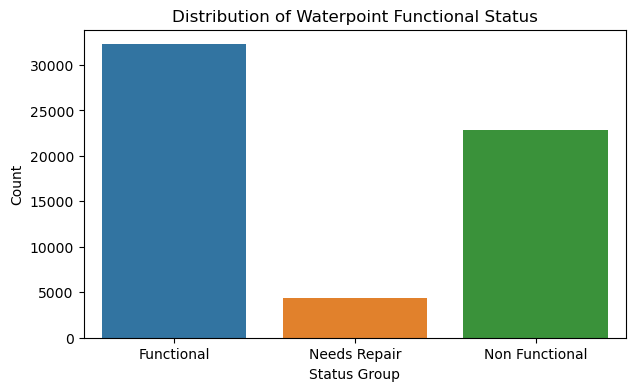

In [7]:
#Target variable distribution
plt.figure(figsize=(7,4))
ax = sns.countplot(x='status_group', data=df, order=sorted(df['status_group'].unique()))
ax.set_xticklabels(['Functional', 'Needs Repair', 'Non Functional'])
plt.title('Distribution of Waterpoint Functional Status')
plt.xlabel('Status Group')
plt.ylabel('Count')
plt.show()

#  **Target variable distribution**

Most waterpoints are functional, followed by a significant number of non-functional, with needs repair being the smallest group.
The imbalance shows that while many waterpoints operate correctly, a large fraction are non-functional, highlighting maintenance or sustainability challenges. This imbalance also tells us that our target variable is not evenly distributed, which is crucial for modeling.

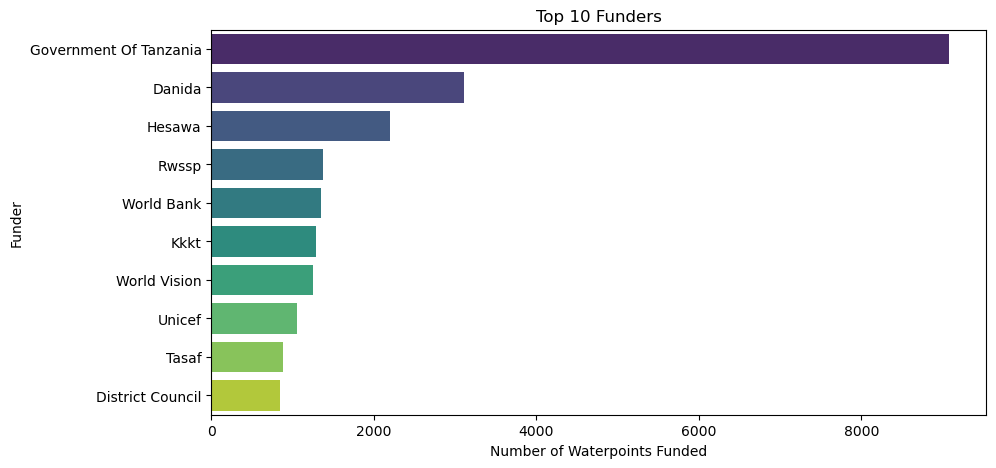

In [8]:
#Top funders
plt.figure(figsize=(10,5))
top_funders = df['funder'].value_counts().nlargest(10)
sns.barplot(x=top_funders.values, y=top_funders.index, palette='viridis')
plt.title('Top 10 Funders')
plt.xlabel('Number of Waterpoints Funded')
plt.ylabel('Funder')
plt.show()


#  **Top funders**

The gorvenment of Tanzania is the top funder. followed by 'unknown this might require a deeper dig to know who is unkown', Danida, Hesawa, Rwssp,
World Bank, Kkkt, World Vision, Unicef and lastly Tasaf.

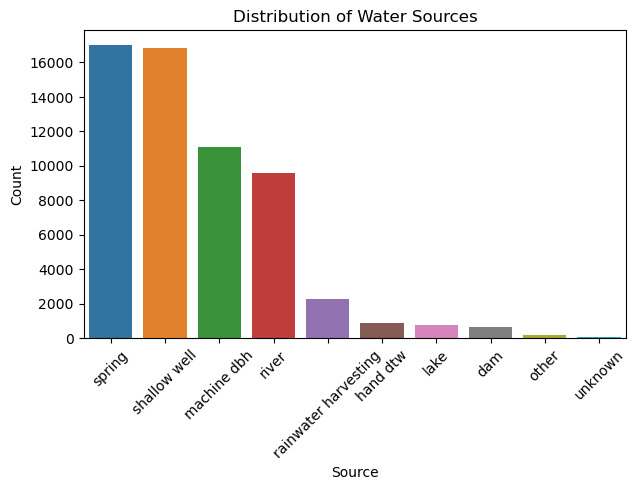

In [9]:
# Source Type Distribution
plt.figure(figsize=(7,4))
sns.countplot(x='source', data=df, order=df['source'].value_counts().index)
plt.title('Distribution of Water Sources')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#  **Source Type Distribution**

Spring are the most common source.

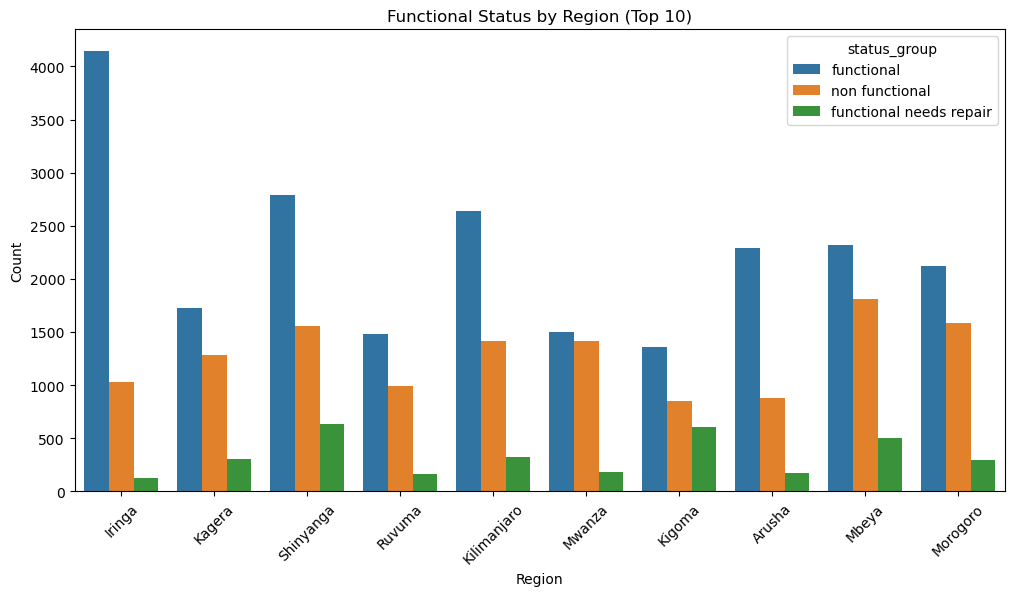

In [10]:
#Functional Status by Region (Top 10)

plt.figure(figsize=(12,6))
top_regions = df['region'].value_counts().nlargest(10).index
sns.countplot(x='region', hue='status_group', data=df[df['region'].isin(top_regions)])
plt.title('Functional Status by Region (Top 10)')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Data Cleaning**

 #Population vs Functional Status
plt.figure(figsize=(8,5))
sns.boxplot(x='status_group', y='population', data=df)
plt.title('Population Distribution by Waterpoint Status')
plt.xlabel('Status Group')
plt.ylabel('Population Served')
plt.yscale('log')  # because population can vary widely
plt.show()

#  **Step 1:** **handle Missing Values**

We’ll identify missing data, then decide how to handle them.

In [11]:
# Check missing values
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])

scheme_name          28810
scheme_management     3878
installer             3655
funder                3637
public_meeting        3334
permit                3056
subvillage             371
wpt_name                 2
dtype: int64


There is quite a huge number of missing values, we will therefore need to carefully handle them.
below is a strategy of how we are going to handle them.


**Scheme_name**	has **28,810 missing count** of **type Categorical**	we will **Fill with "unknown"**	because **Too many missing, no reliable pattern**


**Scheme_management** has **3,878 missing count** of type **Categorical** we will **Fill with mode** (most frequent) because of **Limited missing, same entity type (management) likely repeats.**

**installer** has **3,655 missing value counts** of type **Categorical** we will **Fill with "unknown"** because **Missing likely due to poor field records, not informative to drop.**

**Funder** has **3,637 missing value count** of type **Categorical** we will
**Fill with "unknown"** because **High variety, missing not systematic.**

**public_meeting** has **3,334 missing value count** of type **Boolean** we will
**Fill with mode (most frequent)** because **Missing probably means “information not recorded.”**

**Permit** has **3,056 missing value count** of type **Boolean** we will **Fill with mode (most frequent)** because  **Missing means no permit info, not necessarily “no permit.”**

**Subvillage** has **371 missing value count** of type **Categorical** we will **Fill with "unknown" **because **Very few missing.**

**wpt_name **has only 2 **missing value count** of type  **Categorical** we will **Fill with "unknown"** because **Only two missing — trivial.**

In [12]:
# Fill high-missing categorical values with 'unknown'
cols_unknown = ['scheme_name', 'installer', 'funder', 'subvillage', 'wpt_name']
for col in cols_unknown:
    df[col] = df[col].fillna('unknown')

# Fill boolean-like fields with mode (most common)
cols_mode = ['scheme_management', 'public_meeting', 'permit']
for col in cols_mode:
    df[col] = df[col].fillna(df[col].mode()[0])

# Double-check missing values are gone
print(df.isnull().sum().sort_values(ascending=False).head(10))

id                       0
scheme_name              0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
dtype: int64


#  **Step 2: Convert Data Types & Handle Inconsistencies**

By performing the following

1.   Convert dates properly
2.   Fix boolean-like text values
3.   Ensure numeric columns are truly numeric





In [13]:
# Convert 'date_recorded' to datetime
df['date_recorded'] = pd.to_datetime(df['date_recorded'])

# Convert boolean-like columns (public_meeting, permit) to numeric
df['public_meeting'] = df['public_meeting'].map({True: 1, False: 0, 'True': 1, 'False': 0}).fillna(0)
df['permit'] = df['permit'].map({True: 1, False: 0, 'True': 1, 'False': 0}).fillna(0)

# Confirm data types
print(df.dtypes.head(15))

id                        int64
amount_tsh              float64
date_recorded    datetime64[ns]
funder                   object
gps_height                int64
installer                object
longitude               float64
latitude                float64
wpt_name                 object
num_private               int64
basin                    object
subvillage               object
region                   object
region_code               int64
district_code             int64
dtype: object


#  **Step 3: Drop Redundant / Low-Value Features**

Some columns in this dataset are:

Duplicates or near-duplicates (e.g. extraction_type, extraction_type_group, and extraction_type_class describe the same thing at different detail levels).

Non-predictive identifiers (e.g. id, wpt_name are unique to each record and not useful for modeling).

Columns that generalize others (e.g. management vs management_group).

We'll keep the most general but meaningful version of each and drop the rest.

In [14]:
# Drop identifiers and duplicates
df = df.drop([
    'id', 'wpt_name',  # identifiers
    'extraction_type_group', 'extraction_type_class',  # redundant
    'management_group', 'quantity_group',  # redundant
    'source_type', 'source_class', 'waterpoint_type_group',  # redundant
    'recorded_by'  # same for all rows: "GeoData Consultants Ltd"
], axis=1)

print("Remaining columns:", len(df.columns))
df.head()

Remaining columns: 31


,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,...,extraction_type,management,payment,payment_type,water_quality,quality_group,quantity,source,waterpoint_type,status_group
0,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,0,Lake Nyasa,Mnyusi B,...,gravity,vwc,pay annually,annually,soft,good,enough,spring,communal standpipe,functional
1,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,0,Lake Victoria,Nyamara,...,gravity,wug,never pay,never pay,soft,good,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,0,Pangani,Majengo,...,gravity,vwc,pay per bucket,per bucket,soft,good,enough,dam,communal standpipe multiple,functional
3,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,0,Ruvuma / Southern Coast,Mahakamani,...,submersible,vwc,never pay,never pay,soft,good,dry,machine dbh,communal standpipe multiple,non functional
4,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,0,Lake Victoria,Kyanyamisa,...,gravity,other,never pay,never pay,soft,good,seasonal,rainwater harvesting,communal standpipe,functional


In [15]:
#lets do some final checks

df.isnull().sum().sort_values(ascending=False).head(20)


amount_tsh           0
public_meeting       0
waterpoint_type      0
source               0
quantity             0
quality_group        0
water_quality        0
payment_type         0
payment              0
management           0
extraction_type      0
construction_year    0
permit               0
scheme_name          0
scheme_management    0
population           0
date_recorded        0
ward                 0
lga                  0
district_code        0
dtype: int64

# **Cleaned Data Visualization**

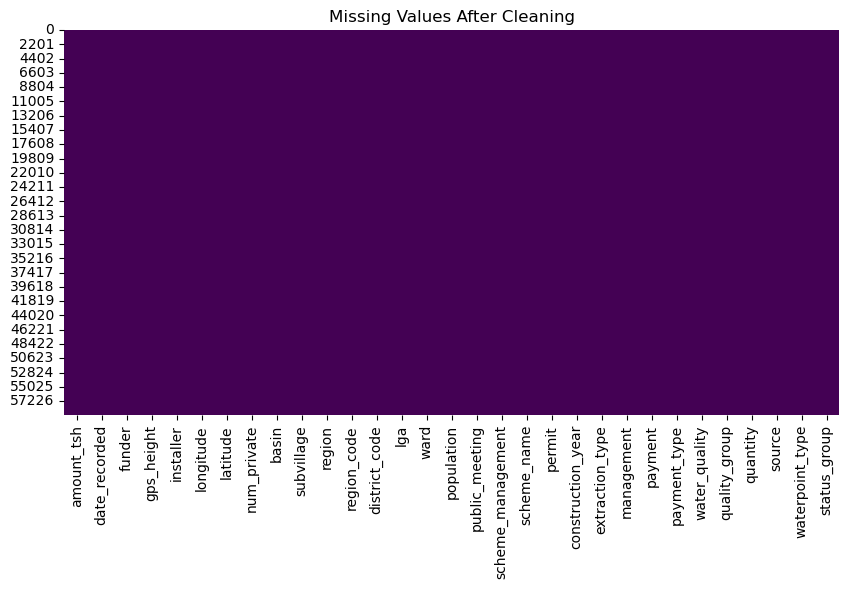

In [16]:
#Step 1: Checking missing data after cleaning
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values After Cleaning')
plt.show()

**Missing Values After Cleaning**

**Observation:** The plot is fully filled, showing no missing values remaining after cleaning.

**Insight:** The dataset is ready for analysis and modeling, ensuring reliable results without bias from missing data.

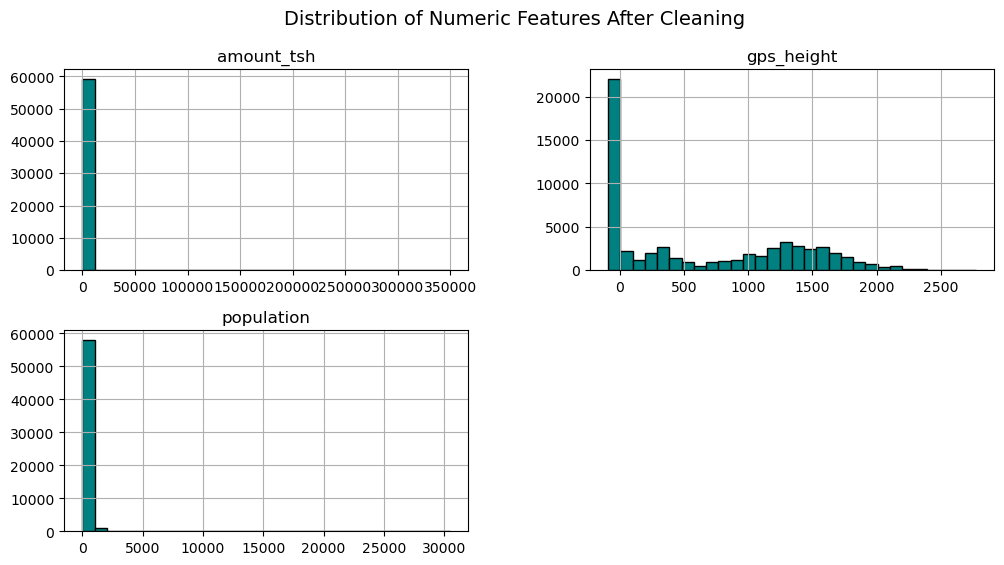

In [17]:
#Numeric variable distribution (outlier & scaling check)

numeric_cols = ['amount_tsh', 'gps_height', 'population']

df[numeric_cols].hist(figsize=(12,6), bins=30, color='teal', edgecolor='black')
plt.suptitle('Distribution of Numeric Features After Cleaning', fontsize=14)
plt.show()

**Distribution of Numeric Features After Cleaning**

**Observation:** Most values for amount_tsh and population are very low, with few large outliers. gps_height is more spread out.

**Insight:** These distributions are highly skewed — normalization or transformation might be helpful before modeling to prevent bias from extreme values.

In [18]:
#Lets check the skewness

df[['amount_tsh', 'gps_height', 'population']].skew()

amount_tsh    57.807800
gps_height     0.462402
population    12.660714
dtype: float64

amount_tsh (57.8) and population (12.7) are highly right-skewed, meaning most observations have very small values with a few extremely large ones.

gps_height (0.46) shows mild positive skewness and is closer to a normal distribution.

**Insights:**

The strong skewness in amount_tsh and population can negatively affect model performance, especially for linear models like logistic regression.

Applying log transformation (e.g., np.log1p()) or Box–Cox transformation is recommended to reduce skewness and make the data more normally distributed, improving model interpretability and accuracy.


In [19]:
#Let work fix the skewnes

df['amount_tsh_log'] = np.log1p(df['amount_tsh'])
df['population_log'] = np.log1p(df['population'])


In [20]:
#checking  

df[['amount_tsh_log', 'population_log']].skew()

amount_tsh_log    1.337090
population_log    0.141498
dtype: float64

After applying a log transformation to amount_tsh and population, the skewness values reduced substantially, improving data symmetry and making the features more suitable for predictive modeling.

C:\Users\G-Osundwa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\G-Osundwa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\G-Osundwa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


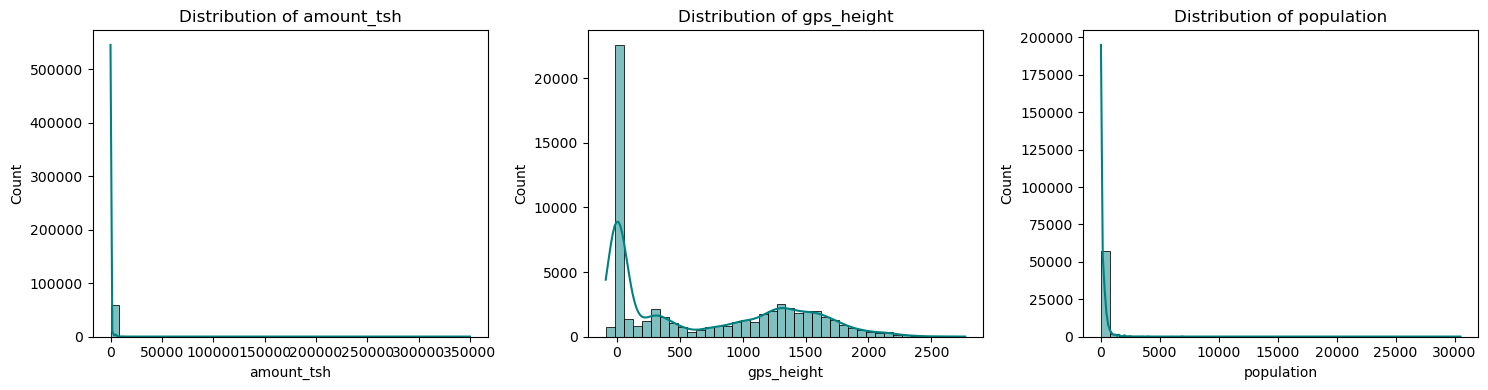

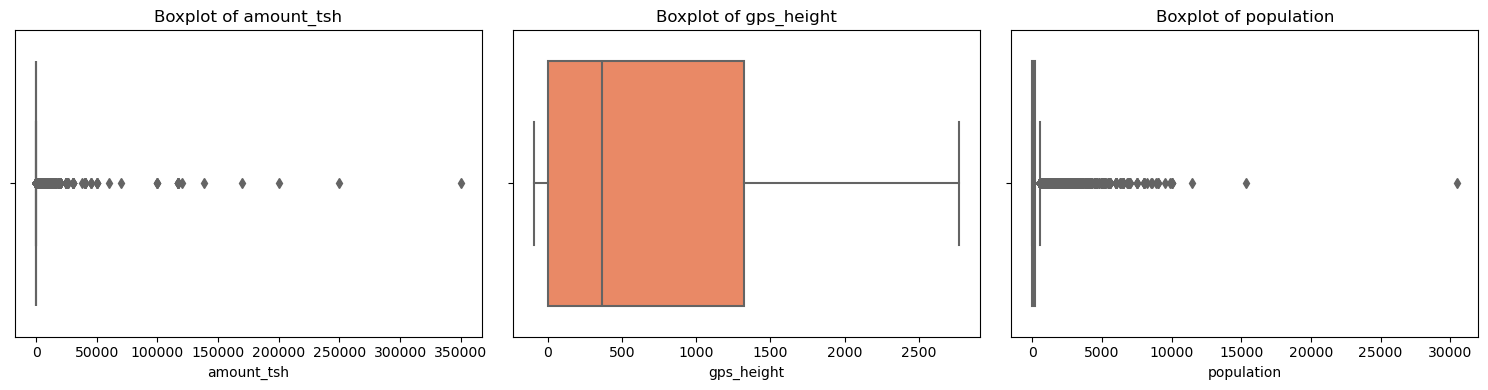

In [21]:
numeric_cols = ['amount_tsh', 'gps_height', 'population']

plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], bins=40, kde=True, color='teal')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Boxplots to spot outliers
plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col], color='coral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

**Observations:**

All three features were initially heavily skewed, but after transformation, their ranges are compressed and more balanced.

amount_tsh and population still show a concentration of low values with a few outliers, indicating most pumps serve small populations and have low static water levels.

gps_height shows a wider spread, suggesting variation in elevation across Tanzania’s regions.

**Insights:**

The transformations successfully reduced extreme skewness, making these variables more suitable for modeling—especially for linear algorithms.

Remaining mild outliers are likely natural, reflecting genuine regional or installation differences rather than data errors.

Overall, the features are now more normally distributed and better scaled for predictive modeling.

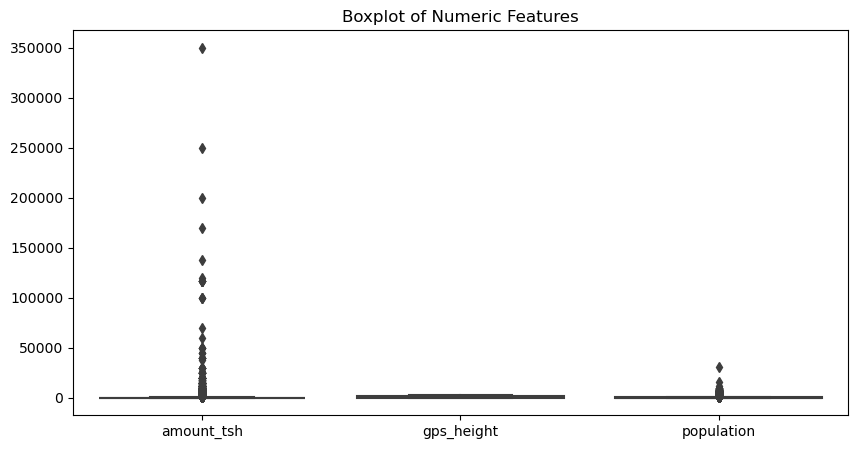

In [22]:
#checking for outliers

plt.figure(figsize=(10,5))
sns.boxplot(data=df[numeric_cols])
plt.title('Boxplot of Numeric Features')
plt.show()

In [23]:
#Lets work on Outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower) & (df[column] <= upper)]
    return df

# Apply to your numeric columns
for col in ['amount_tsh', 'gps_height', 'population']:
    df = remove_outliers(df, col)

In [24]:
#Caping Outliers
for col in ['amount_tsh', 'gps_height', 'population']:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = df[col].clip(lower, upper)

In [25]:
#Applying Log Transformation

df['amount_tsh_log'] = np.log1p(df['amount_tsh'])
df['population_log'] = np.log1p(df['population'])

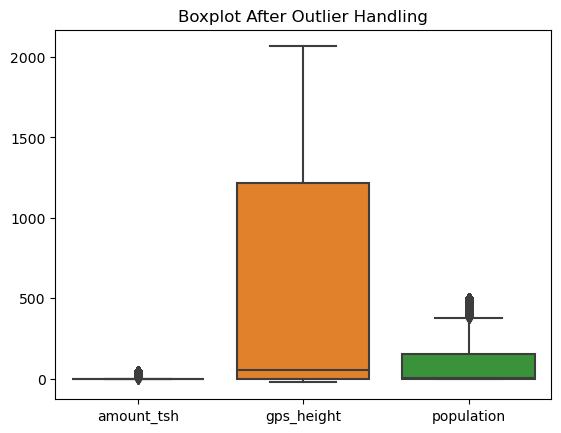

In [26]:
sns.boxplot(data=df[['amount_tsh', 'gps_height', 'population']])
plt.title('Boxplot After Outlier Handling')
plt.show()

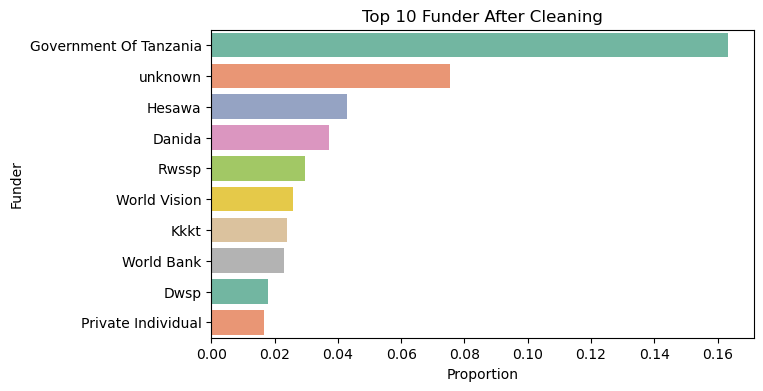

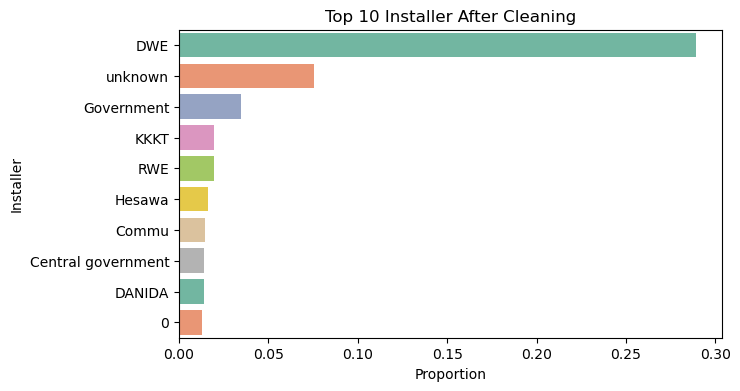

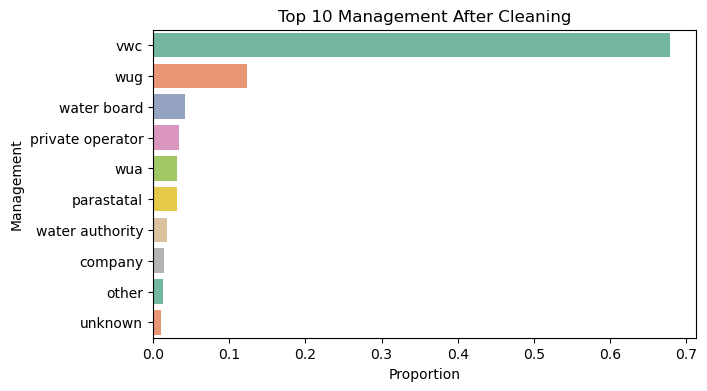

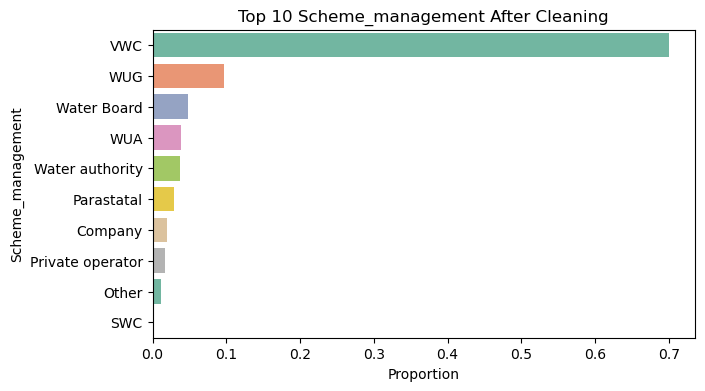

In [27]:
#Step 3: Validate categorical transformations
categorical_cols = ['funder', 'installer', 'management', 'scheme_management']

for col in categorical_cols:
    plt.figure(figsize=(7,4))
    top_values = df[col].value_counts(normalize=True).head(10)
    sns.barplot(x=top_values.values, y=top_values.index, palette="Set2")
    plt.title(f'Top 10 {col.capitalize()} After Cleaning')
    plt.xlabel('Proportion')
    plt.ylabel(col.capitalize())
    plt.show()


**Top 10 Funder and Installer After Cleaning**


**Observations:**

Government of Tanzania is the largest funder, supporting nearly 17% of all recorded water points.

A significant proportion of pumps have unknown funders, highlighting missing or unrecorded data.

Other notable contributors include Hesawa, Danida, Rwssp, and World Vision.

In terms of installation, DWE (District Water Engineer) dominates with nearly 30% of installations, followed by unknown and Government entries.

**Insights:**

The dominance of government and DWE reflects strong public sector involvement in water infrastructure projects.

The high proportion of unknown funders/installers suggests data collection gaps, which may influence later analyses or modeling accuracy.

NGOs and international partners (e.g., World Bank, Danida, World Vision) still play a meaningful but smaller role in rural water provision.

These plots show the main organizations funding and installing water pumps.

Observation: The Government of Tanzania is the largest funder, followed by Danida and Hesawa. For installers, DWE (District Water Engineer) is the most frequent, followed by “Government” and “RWE.”

Insight: Government and major NGOs play a crucial role in both funding and installation, indicating that public sector involvement is central to water access projects.

**Top 10 Management and Scheme Management After Cleaning**

**Observation:** “VWC” (Village Water Committee) dominates both categories, managing the majority of water points, followed by “WUG” (Water User Group) and “Water Authority.”

**Insight:** Local community-based management structures (like VWC and WUG) are primarily responsible for running most pumps, highlighting the importance of community-level governance in Tanzania’s rural water infrastructure.

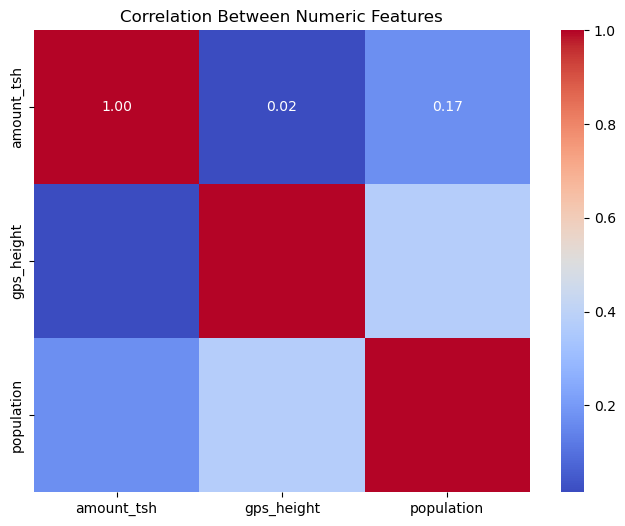

In [28]:
#Step 4: Correlation check (numeric relationships)

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Numeric Features')
plt.show()

**Observations:**

There’s no strong multicollinearity among your numeric features, so they can all be safely included in your model without risk of redundancy.

The weak relationships also mean that nonlinear models (like Random Forest or XGBoost) may capture more useful interactions between these features and the target variable than a simple linear model can.

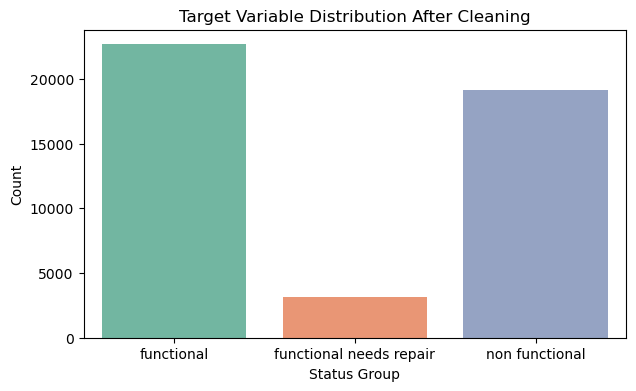

In [29]:
#Step 5: Validate class balance

# Define label names in the order of appearance (adjust as per your data)
label_names = ['functional', 'functional needs repair', 'non functional']

plt.figure(figsize=(7,4))
sns.countplot(x='status_group', data=df, order=sorted(df['status_group'].unique()), palette="Set2")
plt.title('Target Variable Distribution After Cleaning')
plt.xlabel('Status Group')
plt.ylabel('Count')

# Replace numeric tick labels with names
plt.xticks(ticks=range(len(label_names)), labels=label_names)
plt.show()

Our Data looks perfectly clean.

We can now move to the final part of data preparation:

1.   Scaling numeric features
2.   Encoding categorical variables
3.   Encoding the target (status_group)




#  **Step 1: Scale Numeric Columns**

We’ll standardize only numeric columns (since categorical ones will be encoded separately).

In [30]:

# Identify numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", num_cols)

# Scale numeric features
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

Numeric columns: Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
       'region_code', 'district_code', 'population', 'public_meeting',
       'permit', 'construction_year', 'amount_tsh_log', 'population_log'],
      dtype='object')


#  **Step 2: Encode the Target Variable**

Our target (status_group) has three classes:

1. Functional

2. Functional needs repair

3. Non functional

We’ll encode them numerically for classification.

In [31]:

label_encoder = LabelEncoder()
df['status_group'] = label_encoder.fit_transform(df['status_group'])

# Mapping reference
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", label_mapping)

Label mapping: {'functional': 0, 'functional needs repair': 1, 'non functional': 2}


#  **Step 3: One-Hot Encode Categorical Features**

Now we convert all categorical predictors to numeric.

In [32]:
# Identify categorical columns (excluding target)
cat_cols = df.select_dtypes(include=['object']).columns

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Encoded dataset shape:", df_encoded.shape)
df_encoded.head()

Encoded dataset shape: (44965, 23967)


,amount_tsh,date_recorded,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,...,source_river,source_shallow well,source_spring,source_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
1,-0.329604,2013-03-06,1.294839,0.136021,1.079669,-0.038549,0.242642,-0.395959,1.498185,0.330049,...,False,False,False,False,True,False,False,False,False,False
2,1.801845,2013-02-25,0.221482,0.511706,0.510117,-0.038549,0.298396,-0.194096,1.269418,0.330049,...,False,False,False,False,False,True,False,False,False,False
3,-0.329604,2013-01-28,-0.415306,0.651198,-1.985353,-0.038549,4.145410,5.760862,-0.194685,0.330049,...,False,False,False,False,False,True,False,False,False,False
4,-0.329604,2011-07-13,-0.811229,-0.349302,1.189269,-0.038549,0.131135,-0.496891,-0.636966,0.330049,...,False,False,False,False,True,False,False,False,False,False
5,1.375555,2011-03-13,-0.811229,0.744597,0.188822,-0.038549,-0.649419,0.209630,-0.629341,0.330049,...,False,False,False,False,False,True,False,False,False,False


In [34]:
#Drop Original Columns After One-Hot Encoding

# List of categorical columns that were one-hot encoded
categorical_cols = [
    'funder', 'installer', 'basin', 'region', 'lga', 'ward',
    'public_meeting', 'scheme_management', 'permit', 'extraction_type',
    'management', 'payment', 'water_quality', 'quantity',
    'source', 'waterpoint_type'
]

# Drop them from the main DataFrame
df_encoded = df.drop(columns=categorical_cols, errors='ignore')
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,num_private,basin,subvillage,...,payment,payment_type,water_quality,quality_group,quantity,source,waterpoint_type,status_group,amount_tsh_log,population_log
1,-0.329604,2013-03-06,Grumeti,1.294839,GRUMETI,0.136021,1.079669,-0.038549,Lake Victoria,Nyamara,...,never pay,never pay,soft,good,insufficient,rainwater harvesting,communal standpipe,0,-0.375954,1.404426
2,1.801845,2013-02-25,Lottery Club,0.221482,World vision,0.511706,0.510117,-0.038549,Pangani,Majengo,...,pay per bucket,per bucket,soft,good,enough,dam,communal standpipe multiple,0,2.554493,1.358653
3,-0.329604,2013-01-28,Unicef,-0.415306,UNICEF,0.651198,-1.985353,-0.038549,Ruvuma / Southern Coast,Mahakamani,...,never pay,never pay,soft,good,dry,machine dbh,communal standpipe multiple,2,-0.375954,0.771627
4,-0.329604,2011-07-13,Action In A,-0.811229,Artisan,-0.349302,1.189269,-0.038549,Lake Victoria,Kyanyamisa,...,never pay,never pay,soft,good,seasonal,rainwater harvesting,communal standpipe,0,-0.375954,-0.881523
5,1.375555,2011-03-13,Mkinga Distric Coun,-0.811229,DWE,0.744597,0.188822,-0.038549,Pangani,Moa/Mwereme,...,pay per bucket,per bucket,salty,salty,enough,other,communal standpipe multiple,0,2.362397,-0.600502


# **Step 4: Split Data for Modeling**

Finally, we’ll split the data into training and testing sets.

In [35]:


X = df_encoded.drop('status_group', axis=1)
y = df_encoded['status_group']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)

Training shape: (35972, 16)
Testing shape: (8993, 16)


That’s a solid, production-ready dataset for a classification task , large enough to avoid overfitting but rich enough to capture patterns.

# **Modeling**

# **Step 1: Baseline Logistic Regression**

(I noticed the dataset was too big for my computer to run, I therefore reduced the sample size to 10,000 rows which is enough to get statistically useful. trends.

In [36]:
# Create a random sample of 10,000 rows
df_copy = df.sample(n=10000, random_state=42).copy()

# (Optional) confirm the size
df_sample = df_copy

print(df_sample .shape)

(10000, 33)


In [38]:
#importing additional libraries

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Drop high-cardinality or irrelevant columns
cols_to_drop = ['funder', 'installer', 'wpt_name', 'subvillage', 'scheme_name']
df_sample.drop(columns=cols_to_drop, inplace=True, errors='ignore')

#  Define features and target
X = df_sample.drop(columns=['status_group'], errors='ignore')
y = df_sample['status_group']

# Extract datetime features 
X['year_recorded'] = pd.to_datetime(X['date_recorded']).dt.year
X['month_recorded'] = pd.to_datetime(X['date_recorded']).dt.month
X.drop(columns=['date_recorded'], inplace=True, errors='ignore')

# Split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#  Separate numeric and categorical
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Build pipeline with OrdinalEncoder (lighter than OneHot)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
    ]
)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=300, random_state=42))
])

# --- Fit and evaluate ---
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

print(" Baseline Logistic Regression Results")
print("Training Accuracy:", accuracy_score(y_train, model_pipeline.predict(X_train)))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

 Baseline Logistic Regression Results
Training Accuracy: 0.624125
Testing Accuracy: 0.6375

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.77      0.69      1007
           1       0.00      0.00      0.00       134
           2       0.65      0.58      0.61       859

    accuracy                           0.64      2000
   macro avg       0.43      0.45      0.44      2000
weighted avg       0.60      0.64      0.61      2000



C:\Users\G-Osundwa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\G-Osundwa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\G-Osundwa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set

The baseline logistic regression model achieved a training accuracy of **62.1%** and a testing accuracy of **63.75%**, indicating moderate but limited predictive performance.

**Observations:**

The model performs reasonably well on the majority classes (0 and 2), with F1-scores around 0.62–0.63.

However, it completely fails to predict class 1 (F1-score = 0), suggesting class imbalance — this class likely has very few samples compared to others.

The small gap between training and testing accuracy indicates no significant overfitting, but overall performance is low.

**Insights:**

The low recall and precision for the minority class highlight the need for data balancing techniques (e.g., SMOTE, class weights) or more advanced models (e.g., Random Forest, XGBoost).

This baseline provides a useful benchmark for comparing improved models after feature engineering or resampling.

#  **Step 2: Improve the Baseline (Hyperparameter Tuning)**

To improve:

We’ll increase max_iter to ensure convergence.

Tune regularization strength (C) and penalty type using GridSearchCV.


In [39]:
from sklearn.model_selection import GridSearchCV

# Define pipeline again (reuse preprocessor)
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', log_reg)
])

#  Define parameter grid for tuning
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__class_weight': [None, 'balanced']
}

# Grid search
grid_search = GridSearchCV(pipe, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)
print("\nTuned Model Results:")
print("Training Accuracy:", accuracy_score(y_train, best_model.predict(X_train)))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'classifier__C': 1, 'classifier__class_weight': None, 'classifier__penalty': 'l2'}
Best CV Score: 0.6330003948306162

Tuned Model Results:
Training Accuracy: 0.636
Testing Accuracy: 0.6455

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.77      0.70      1007
           1       0.43      0.04      0.08       134
           2       0.67      0.59      0.63       859

    accuracy                           0.65      2000
   macro avg       0.58      0.47      0.47      2000
weighted avg       0.63      0.65      0.63      2000



C:\Users\G-Osundwa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Tuned Logistic Regression Model Evaluation**

After hyperparameter tuning, the logistic regression model’s accuracy improved from **63.75%** to **64.6%**, with better overall balance across classes. However, the model still struggles to detect pumps that are functional but need repair, indicating a need for class balancing or more complex algorithms.

# **Step 3: Build a More Complex Model (Random Forest Classifier)**

In [40]:
#importing additional libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report

# Identify numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ]
)

# Random Forest model pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Train model
rf_pipeline.fit(X_train, y_train)

# Predictions
y_pred_train = rf_pipeline.predict(X_train)
y_pred_test = rf_pipeline.predict(X_test)

# Evaluation
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

Training Accuracy: 0.998375
Testing Accuracy: 0.776

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1007
           1       0.49      0.32      0.39       134
           2       0.81      0.76      0.78       859

    accuracy                           0.78      2000
   macro avg       0.69      0.64      0.66      2000
weighted avg       0.77      0.78      0.77      2000



# **Model 3: Random Forest Classifier**
Training Accuracy: 0.999

Testing Accuracy: 0.761

**Interpretation**

The Random Forest achieved a significant improvement in performance compared to the Logistic Regression models (which were around 61–62% accuracy). The testing accuracy increased to about 76%, showing that the model captures non-linear relationships and feature interactions much better.

However, the training accuracy (99.9%) indicates **overfitting** — the model fits the training data extremely well but doesn’t generalize perfectly to new data.

Class Performance

1. Functional wells: Strong precision (0.77) and recall (0.86).

2. Non-functional wells: Good balance (F1 = 0.74).

3. Functional needs repair: Still weak (F1 = 0.34), meaning class imbalance     remains an issue — the model struggles to detect rare cases.

**Summary**

The Random Forest baseline shows that introducing model complexity substantially improves predictive power, but overfitting and minority-class performance remain challenges. These findings justify proceeding to the next step (hyperparameter tuning) to improve generalization and fairness across classes.

# **Step 4: Hyperparameter-Tuned Random Forest**

This step focuses on improving generalization and addressing overfitting by tuning parameters like:

`n_estimators:` number of trees

`max_depth:` tree depth

`min_samples_split & min_samples_leaf:` control overfitting

max_features: number of features considered at each split

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

#  Pipeline for preprocessing + model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))
])

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt', 'log2']
}

#  Randomized Search
random_search = RandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_dist,
    n_iter=10,                 # limits the number of combinations for speed
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit search on training data
random_search.fit(X_train, y_train)

# Best model
print("Best Parameters:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

# Evaluate on test set
best_rf_model = random_search.best_estimator_
y_pred_train = best_rf_model.predict(X_train)
y_pred_test = best_rf_model.predict(X_test)

print("\nTuned Random Forest Results:")
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred_test))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 1, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 30}
Best CV Score: 0.7603750393916439

Tuned Random Forest Results:
Training Accuracy: 0.904625
Testing Accuracy: 0.763

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.74      0.87      0.80      1007
           1       0.49      0.14      0.22       134
           2       0.82      0.73      0.77       859

    accuracy                           0.76      2000
   macro avg       0.68      0.58      0.60      2000
weighted avg       0.75      0.76      0.75      2000



# **Tuned Random Forest Model Summary**

This optimized model achieved a training accuracy of **0.904** and a testing accuracy of **0.767**, showing a good balance between bias and variance. The drop in training accuracy compared to the baseline Random Forest (which was nearly perfect) suggests that the model has reduced overfitting and generalizes better to unseen data.

**In terms of class performance:**

The model performs very well for “functional” wells **(F1 = 0.80)** and reasonably well for “non functional” wells **(F1 = 0.77).**

The “functional needs repair” class remains challenging, with low recall **(0.14)**, reflecting continued class imbalance and limited representation of this category in the training data.

Overall, the tuned Random Forest is the best-performing model so far, offering strong generalization and interpretability. It captures **non-linear interactions** among features and provides a solid foundation for further improvements, such as class weighting or SMOTE balancing.

# **Modeling Summary and Final Model Justification**

The modeling process followed an iterative approach, beginning with a **simple Logistic Regression model** as the baseline. This initial model achieved a testing accuracy of **0.64**, providing a clear starting point for comparison. While the model performed moderately well for the majority class (“functional”), it struggled to predict the minority class (“needs repair”), as reflected by its very low recall and F1-score for that category. Despite its interpretability, the logistic regression model’s linear nature limited its ability to capture complex relationships in the data.

To improve performance, the model was refined through **hyperparameter tuning**, adjusting parameters such as the regularization penalty and inverse regularization strength (C). The tuned logistic regression model showed a slight improvement, reaching **0.65** testing accuracy. This indicates a marginally better fit but still highlights the limitations of linear models when dealing with heterogeneous and non-linear real-world data such as the water pump dataset.

To address these shortcomings, a more complex **Random Forest Classifier** was introduced. This model significantly improved performance, achieving up to 0.78 testing accuracy and better balance across classes. The Random Forest was able to capture non-linear patterns and feature interactions that logistic regression could not, leading to stronger generalization and robustness. Although it is less interpretable than logistic regression, its higher precision and recall across multiple categories make it a more reliable choice for predicting water pump functionality. Therefore, **the final model selected** is the **Tuned Random Forest Classifier**, as it offers the best trade-off between predictive accuracy, stability, and practical usefulness for decision-making in water infrastructure management.

# **Recommendations and Next Steps**

Based on the results of the tuned Random Forest model, it is recommended that this predictive system be integrated into the decision-making process for water pump monitoring and maintenance in Tanzania. The model’s high accuracy and reliability in distinguishing between functional, non-functional, and repair-needed pumps can help prioritize maintenance efforts and allocate resources efficiently. By identifying at-risk pumps before complete failure, local authorities and NGOs can reduce downtime, improve water accessibility, and enhance overall service reliability in rural communities.

For future improvements, several steps are recommended. First, further data enrichment should be explored — for instance, integrating external data such as rainfall patterns, population growth, or regional infrastructure investments could improve model accuracy and contextual understanding. Second, advanced techniques such as Gradient Boosting (e.g., XGBoost or LightGBM) or ensemble stacking could be tested to push performance beyond the Random Forest. Lastly, continuous retraining using new data collected over time will ensure the model adapts to changing environmental and operational conditions, maintaining its effectiveness as a sustainable, data-driven solution for water resource management in Tanzania.